# About Dataset
**Dataset Link**: [Online retail dataset](https://www.kaggle.com/datasets/lakshmi25npathi/online-retail-dataset?resource=download)

**Abstract**: A real online retail transaction data set of two years.

**Data Set Information**:
This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011. The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.

**Attribute Information**:
1. **InvoiceNo**: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. **If this code starts with the letter 'C', it indicates a cancellation**.
2. **StockCode**: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
3. **Description**: Product (item) name. Nominal.
4. **Quantity**: The quantities of each product (item) per transaction. Numeric.
5. **InvoiceDate**: Invice date and time. Numeric. The day and time when a transaction was generated.
6. **Price**: Unit price. Numeric. Product price per unit in sterling (Â£).
7. **CustomerID**: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.
8. **Country**: Country name. Nominal. The name of the country where a customer resides.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta, date, time

### Reading the Excel file and concatinating it into a single dataframe `retail_online`

In [2]:
file_path = 'D:\online_retail_II.xlsx'
retail_online_dict = pd.read_excel(file_path, sheet_name=None)
retail_online = pd.concat(retail_online_dict.values(), ignore_index=True)

## Renaming Columns for Consistency and Convenience

In [3]:
retail_online.rename(columns={'Price': 'UnitPrice', 'Customer ID' : 'CustomerID'}, inplace=True)
retail_online.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


### Understanding the Dataset by knowing its size, column types and its contents

In [4]:
size_retail_online = retail_online.shape
print(f'Total Number of Original Rows: {size_retail_online[0]}')
print(f'Total Number of Original Columns: {size_retail_online[1]}')

Total Number of Original Rows: 1067371
Total Number of Original Columns: 8


In [5]:
retail_online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   UnitPrice    1067371 non-null  float64       
 6   CustomerID   824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


## Identifying Abnormalities
* We examined the **Quantity** and **UnitPrice** columns for outliers:
    * Both columns exhibit extreme values, with maximum and minimum values significantly larger or smaller than the mean.
    * The standard deviations for both columns are relatively large, indicating high variability.
    * Box plots for these columns display several extreme outliers. In fact, the interquartile box is compressed and nearly invisible due to the scale of the outliers. 

In [6]:
retail_online[['Quantity', 'UnitPrice']].describe().round()

,Quantity,UnitPrice
count,1067371.0,1067371.0
mean,10.0,5.0
std,173.0,124.0
min,-80995.0,-53594.0
25%,1.0,1.0
50%,3.0,2.0
75%,10.0,4.0
max,80995.0,38970.0


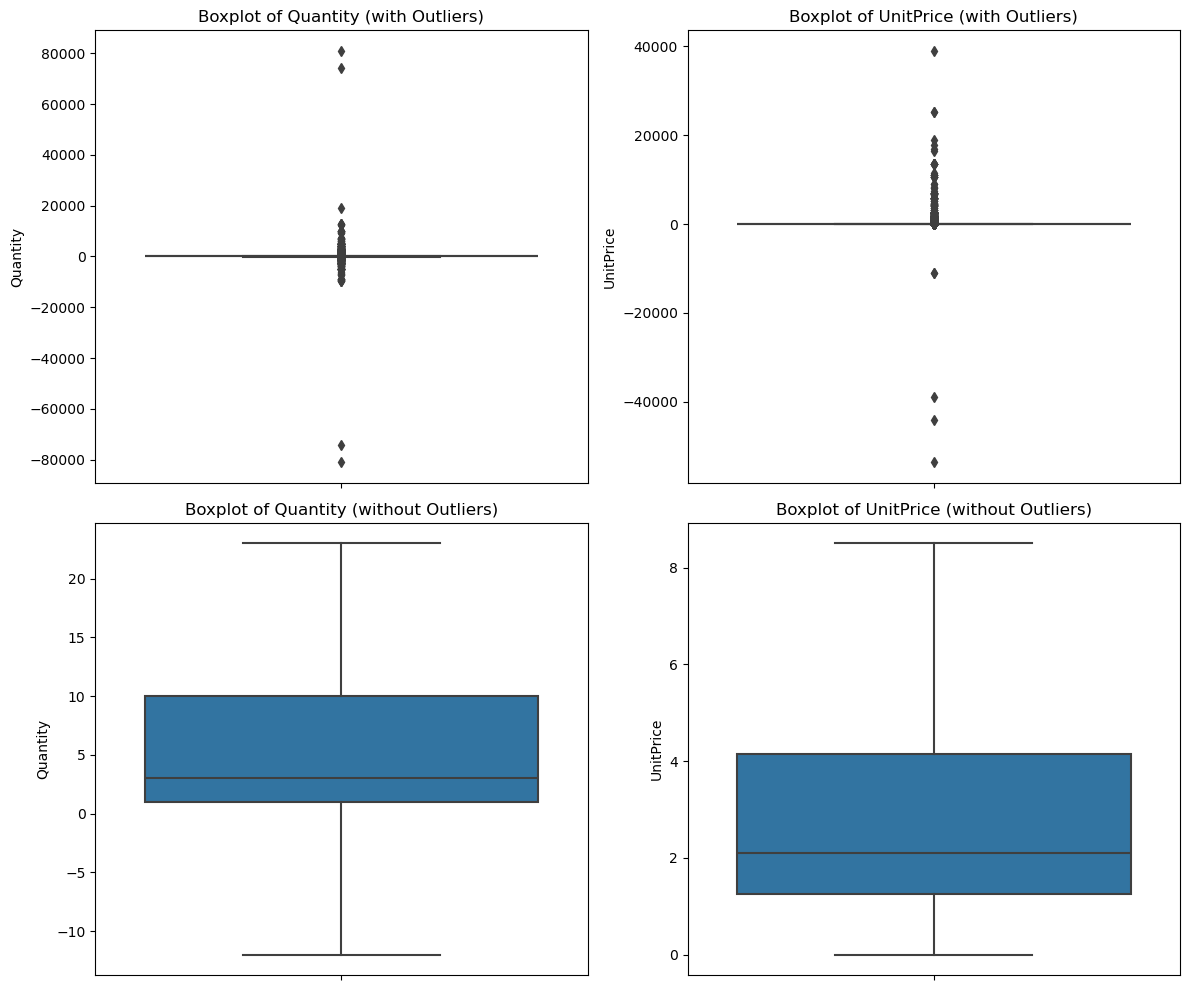

In [7]:
plt.figure(figsize=(12, 10))

# Boxplot for Quantity WITH outliers
plt.subplot(2, 2, 1)
sns.boxplot(y=retail_online['Quantity'])
plt.title('Boxplot of Quantity (with Outliers)')

# Boxplot for Quantity WITHOUT outliers
plt.subplot(2, 2, 3)
sns.boxplot(y=retail_online['Quantity'], showfliers=False)
plt.title('Boxplot of Quantity (without Outliers)')

# Boxplot for UnitPrice WITH outliers
plt.subplot(2, 2, 2)
sns.boxplot(y=retail_online['UnitPrice'])
plt.title('Boxplot of UnitPrice (with Outliers)')

# Boxplot for UnitPrice WITHOUT outliers
plt.subplot(2, 2, 4)
sns.boxplot(y=retail_online['UnitPrice'], showfliers=False)
plt.title('Boxplot of UnitPrice (without Outliers)')

plt.tight_layout()
plt.show()

### Investigating Extreme and Negative Values in Quantity and UnitPrice Columns
#### 1a. Investigation of the Quantity Column
- The extreme positive values in the Quantity column appear legitimate and are likely the result of bulk orders.
- Most negative values in the Quantity column are associated with invoice numbers that start with 'C', which, according to the dataset documentation, indicates cancelled transactions.
- However, some rows contain negative Quantity values without an invoice number starting with 'C'. For instance, rows at indices 263, 283, 284, and 470. Notably, these rows also have UnitPrice equal to 0.

#### 1b. Investigation of Rows with UnitPrice = 0
- Filtering the dataset for rows where UnitPrice = 0 reveals that:
    - The CustomerID field is often missing.
    - The Description field is frequently missing or contains values that suggest data errors or irrelevant entries (e.g., "damaged," "lost," "wet boxes," "mixed up," "missing," etc.).
    - Additionally, rows with a UnitPrice value of 0 account for approximately 0.6% of the entire dataset.
         
**Conclusion**
    - Given the minimal proportion of these rows and their questionable data quality, we will remove all rows with a UnitPrice value of 0 from the `retail_online` DataFrame, as these rows contain little to no useful information for our analysis.

In [8]:
retail_online[retail_online['Quantity'] > 0].sort_values('Quantity', ascending=False).head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1065882,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom
587080,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
90857,497946,37410,BLACK AND WHITE PAISLEY FLOWER MUG,19152,2010-02-15 11:57:00,0.10,13902.0,Denmark
127168,501534,21091,SET/6 WOODLAND PAPER PLATES,12960,2010-03-17 13:09:00,0.10,13902.0,Denmark
127166,501534,21099,SET/6 STRAWBERRY PAPER CUPS,12960,2010-03-17 13:09:00,0.10,13902.0,Denmark


In [9]:
# Filtering 'retail_online' for 'Quantity' values, which are -ve.
retail_online[retail_online['Quantity'] < 0].head(1)     # use 50 for head to understand point 2 above

,Invoice,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia


In [10]:
# Filtering 'retail_online' for 'Quantity' values which are -ve and also 'UnitPrice' not equal to zero
retail_online[(retail_online['Quantity'] < 0) & (retail_online['UnitPrice'] != 0)].sort_values(by='Quantity').head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1065883,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom
587085,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom
507225,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom
529729,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom
359669,C524235,21088,SET/6 FRUIT SALAD PAPER CUPS,-7128,2010-09-28 11:02:00,0.08,14277.0,France


In [11]:
# Filtering 'retail_online' for 'UnitPrice' column with values equal to zero
retail_online[retail_online['UnitPrice'] == 0].tail(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1062442,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom
1063965,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,NaN,United Kingdom
1063966,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.0,NaN,United Kingdom
1064015,581408,85175,NaN,20,2011-12-08 14:06:00,0.0,NaN,United Kingdom
1064386,581422,23169,smashed,-235,2011-12-08 15:24:00,0.0,NaN,United Kingdom


In [12]:
# Data with UnitPrice=0 and Description, CustomerID available - only 71 rows available
retail_online[(retail_online['UnitPrice'] == 0) & (retail_online['Description'].notna()) & (retail_online['CustomerID'].notna())].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
4674,489825,22076,6 RIBBONS EMPIRE,12,2009-12-02 13:34:00,0.0,16126.0,United Kingdom
6781,489998,48185,DOOR MAT FAIRY CAKE,2,2009-12-03 11:19:00,0.0,15658.0,United Kingdom
16107,490727,M,Manual,1,2009-12-07 16:38:00,0.0,17231.0,United Kingdom
18738,490961,22065,CHRISTMAS PUDDING TRINKET POT,1,2009-12-08 15:25:00,0.0,14108.0,United Kingdom
18739,490961,22142,CHRISTMAS CRAFT WHITE FAIRY,12,2009-12-08 15:25:00,0.0,14108.0,United Kingdom


In [13]:
print(f"Number of rows with UnitPrice = 0 are : {retail_online[retail_online['UnitPrice'] == 0].shape[0]}")

Number of rows with UnitPrice = 0 are : 6202


In [14]:
print(f"Number of rows with UnitPrice = 0 with both Description and CustomerID as NaN: {retail_online[(retail_online['UnitPrice'] == 0) & (retail_online['Description'].isna()) & (retail_online['CustomerID'].isna())].shape[0]}")

Number of rows with UnitPrice = 0 with both Description and CustomerID as NaN: 4382


In [15]:
# % of data with rows haveing UnitPrice=0
(retail_online[retail_online['UnitPrice'] == 0].shape[0]/retail_online.shape[0])*100

0.5810538228975679

#### 2. Investigation of the UnitPrice Column with Extreme Positive and Negative Values
- Rows with negative values in the UnitPrice column have 'Adjust bad debt' recorded in the Description field, indicating accounting adjustments. These entries are not relevant for our analysis and will be removed from the `retail_online` DataFrame.

- Rows with extremely high positive values in the UnitPrice column often have Description values such as 'AMAZONFEE', 'Manual', 'BankCharges', 'POST', and similar terms. These appear to be shipping fees or external platform costs, which are outside the scope of our product-level analysis. These rows will also be removed from the `retail_online` DataFrame.

In [16]:
# Filtering all -ve values in UnitPrice column
retail_online[retail_online['UnitPrice'] < 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom
825444,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
825445,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [17]:
# Filtering all +ve extremly high values in UnitPrice column
retail_online[retail_online['UnitPrice'] > 0].sort_values('UnitPrice', ascending=False).head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
748142,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.00,15098.0,United Kingdom
241824,C512770,M,Manual,-1,2010-06-17 16:52:00,25111.09,17399.0,United Kingdom
241827,512771,M,Manual,1,2010-06-17 16:53:00,25111.09,NaN,United Kingdom
320581,C520667,BANK CHARGES,Bank Charges,-1,2010-08-27 13:42:00,18910.69,NaN,United Kingdom
1050063,C580605,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:36:00,17836.46,NaN,United Kingdom


## Identifying Missing Values
- The **Description** and **CustomerID** columns are the only columns containing missing values in the dataset.

In [18]:
retail_online.isna().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     243007
Country             0
dtype: int64

## Data Cleaning  
- The following steps will be performed to clean the dataset and prepare it for analysis:
    - Remove duplicate rows.
    - Remove rows with UnitPrice = 0 or negative values, as these entries are either invalid or irrelevant for the analysis.
    - Remove irrelevant rows where the Description field contains terms such as 'AMAZONFEE', 'Manual', 'BankCharges', 'Adjust bad debt', and similar entries. 

- It is worth noting that approximately 22% of the remaining rows have missing values in the CustomerID column. However, these rows will be retained for the following reasons:
    - The remaining fields contain legitimate and relevant information.
    - Based on the dataset documentation and patterns observed, these may correspond to unregistered or anonymous customers.
    -Excluding these rows would result in unnecessary data loss.

In [19]:
# Checking for duplicates
retail_online.duplicated().sum()

34335

In [20]:
# Removing duplicares from 'retail_online' dataframe
cleaned_retail = retail_online.drop_duplicates()

In [21]:
# Remove UnitPrice = 0 and UnitPrice < 0.
cleaned_retail = cleaned_retail[cleaned_retail['UnitPrice'] > 0].copy()

###  Removing Irrelevant Data Rows
1. B - Adjust bad debt
2. M or m- Manuel
3. DOT - DOTCOM POSTAGE
4. POST - POSTAGE
5. AMAZONFEE - AMAZON-FEE
6. ADJUST
7. ADJUST2
8. D - Discount
9. Bank Charges
10. S - Samples
11. CRUK - CRUK Commission
12. Dotcomgiftshop Gift Voucher

In [22]:
# List of stock codes to exclude
exclude_codes = ['B', 'M', 'm', 'DOT', 'POST', 'AMAZONFEE', 'ADJUST', 'ADJUST2', 'D', 'BANK CHARGES', 'S', 'CRUK', 'Dotcomgiftshop Gift Voucher']

# Filter and view all matching rows
cleaned_retail[
    (cleaned_retail['StockCode'].isin(exclude_codes)) |
    (cleaned_retail['StockCode'].str.startswith('gif', na=False))
]

,Invoice,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.00,12682.0,France
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.0,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.0,Belgium
625,489526,POST,POSTAGE,6,2009-12-01 11:50:00,18.00,12533.0,Germany
735,C489535,D,Discount,-1,2009-12-01 12:11:00,9.00,15299.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
1067191,581570,POST,POSTAGE,1,2011-12-09 11:59:00,18.00,12662.0,Germany
1067228,581574,POST,POSTAGE,2,2011-12-09 12:09:00,18.00,12526.0,Germany
1067229,581578,POST,POSTAGE,3,2011-12-09 12:16:00,18.00,12713.0,Germany


In [23]:
# Remove the 'exclude_codes' list from 'cleaned_retail' DataFrame
cleaned_retail = cleaned_retail[~cleaned_retail['StockCode'].isin(exclude_codes) & 
                                ~cleaned_retail['StockCode'].str.startswith('gif', na=False)]

In [24]:
# Checking for missing values
cleaned_retail.isna().sum()

Invoice             0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     227109
Country             0
dtype: int64

In [25]:
# CustomerID rows with missing (Nan) data
cleaned_retail[cleaned_retail['CustomerID'].isna()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
1066996,581498,85049e,SCANDINAVIAN REDS RIBBONS,4,2011-12-09 10:26:00,3.29,NaN,United Kingdom
1066997,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
1066998,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
1066999,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom


In [26]:
(cleaned_retail['CustomerID'].isna().sum())/(cleaned_retail.shape[0])*100

22.23158698461177

### Separating Delivered Products from Cancelled Products for Product Analysis
1. A new column called `Returned` will be added to the cleaned_retail DataFrame. This column will flag all rows where the InvoiceNo starts with 'C', indicating that the transaction was cancelled and the product was returned.
2. A new DataFrame called `delivered_products` will be created by filtering out all rows marked as cancelled, keeping only successfully delivered product records.
4. A `TotalRevenue` column will be added to the `delivered_products` DataFrame by multiplying the `UnitPrice` and `Quantity` for each row.
5. A `Month` column will also be added to the `delivered_products` DataFrame by extracting the month from the InvoiceDate column.

In [27]:
# Adding 'Cancelled' Boolean column: True if Invoice starts with 'C', else False
cleaned_retail['Returned'] = (cleaned_retail['Invoice'].str.startswith('C') == True)
cleaned_retail[cleaned_retail['Returned'] == True]

,Invoice,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Returned
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,True
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia,True
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia,True
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia,True
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,True
...,...,...,...,...,...,...,...,...,...
1065909,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,2011-12-09 09:57:00,1.95,14397.0,United Kingdom,True
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,True
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,True
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,True


In [28]:
# Creating 'delivered_products' filtered from 'cleaned_retail' 
delivered_products = cleaned_retail[cleaned_retail['Returned'] == False].copy()

In [29]:
# Including 'TotalRevenue' column in 'delivered_products'
delivered_products['TotalRevenue'] = delivered_products['Quantity'] * delivered_products['UnitPrice']

# Including 'Month' column extracted from the 'InvoiceDate' Column
delivered_products['Month'] = delivered_products['InvoiceDate'].dt.to_period('M')

#### Inconsistent Product Descriptions for the Same StockCode
1. We observed that some products have inconsistent entries in the `Description` field for the same StockCode. While this could be corrected manually, it is unnecessary for our analysis since `StockCode` uniquely identifies each product, and we will rely on StockCode rather than Description.

In [30]:
cleaned_retail[cleaned_retail['Returned'] == False].groupby(by=['StockCode', 'Description'])['Quantity'].sum().sort_values(ascending=False).head(15)

StockCode  Description                        
84077      WORLD WAR 2 GLIDERS ASSTD DESIGNS      106139
85123A     WHITE HANGING HEART T-LIGHT HOLDER      94142
23843      PAPER CRAFT , LITTLE BIRDIE             80995
84879      ASSORTED COLOUR BIRD ORNAMENT           80082
23166      MEDIUM CERAMIC TOP STORAGE JAR          78033
85099B     JUMBO BAG RED RETROSPOT                 77280
17003      BROCADE RING PURSE                      70369
21977      PACK OF 60 PINK PAISLEY CAKE CASES      56061
84991      60 TEATIME FAIRY CAKE CASES             54028
22197      SMALL POPCORN HOLDER                    48561
21212      PACK OF 72 RETROSPOT CAKE CASES         48156
           PACK OF 72 RETRO SPOT CAKE CASES        46728
15036      ASSORTED COLOURS SILK FAN               44272
22492      MINI PAINT SET VINTAGE                  42286
84755      COLOUR GLASS T-LIGHT HOLDER HANGING     40439
Name: Quantity, dtype: int64

# Poduct Analysis
1. Identifying Best-Selling Products
    - Monthly Sales Trend for Top 3 Best-Selling Products
2. Top Revenue-Generating Products
3. Relationship Between Quantity Sold and Total Revenue per Product
4. Top Premium Products by Average Unit Price
5. Identifying Underperforming Products: Low Demand & Low Revenue
6. Identifying Consistently High-Demand Products based on demand stability
7. Product Revenue Concentration (Pareto 80/20 Analysis)

## 1. Identifying Best-Selling Products

In [31]:
top_selling = delivered_products.groupby(by='StockCode').agg({'Description': 'first', 'Quantity': 'sum'}).sort_values(by='Quantity', ascending=False)
top_selling_10 = top_selling.head(10)
top_selling_10

,Description,Quantity
StockCode,,
84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,106139
85099B,JUMBO BAG RED WHITE SPOTTY,96757
21212,PACK OF 72 RETRO SPOT CAKE CASES,94884
85123A,WHITE HANGING HEART T-LIGHT HOLDER,94203
22197,"POPCORN HOLDER , SMALL",88499
23843,"PAPER CRAFT , LITTLE BIRDIE",80995
84879,ASSORTED COLOUR BIRD ORNAMENT,80082
23166,MEDIUM CERAMIC TOP STORAGE JAR,78033
17003,BROCADE RING PURSE,70369


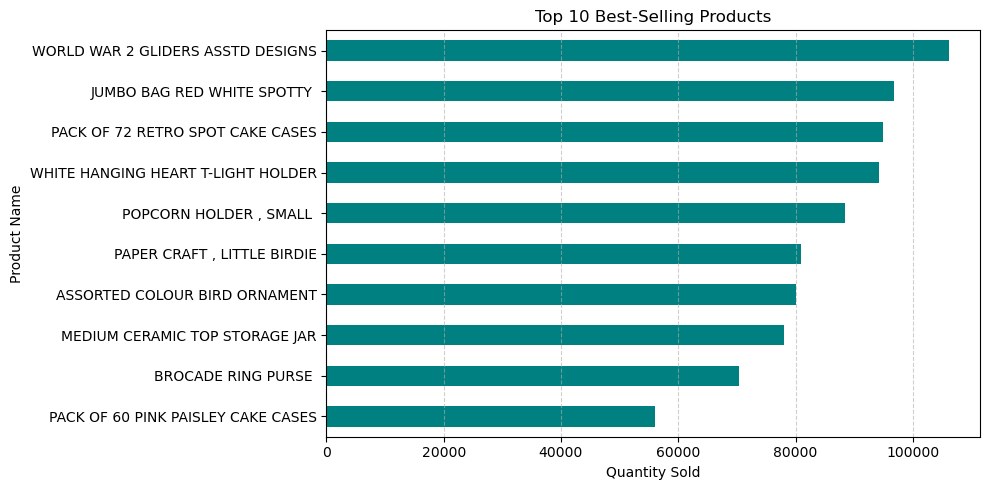

In [32]:
# Plotting Top 10 Best-Selling Products
top_selling_10.sort_values(by='Quantity').plot.barh(x='Description', y='Quantity', legend=False, color='teal', figsize=(10,5))
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name')
plt.grid(True, axis='x', alpha=0.6, linestyle='--')
plt.tight_layout()
plt.show()

#### Monthly Sales Trend for Top 3 Best-Selling Products
* The line graph displays the monthly sales performance (quantity sold) of the top 3 best-selling products. 
* This visualization helps identify sales patterns, seasonal demand across the observed period..


In [33]:
# Filtering only Top 3 Products
top_selling_3 = top_selling.head(3)
top3_StockCode = top_selling_3.index.tolist()
top3_data = delivered_products[delivered_products['StockCode'].isin(top3_StockCode)].copy()

In [34]:
# Grouping by Month and StockCode
monthly_quantity = top3_data.groupby(['Month', 'StockCode'])['Quantity'].sum().reset_index()

In [35]:
# Merging Descriptions for readability
monthly_quantity = monthly_quantity.merge(top_selling_3['Description'], on='StockCode', how='left')

In [36]:
# Pivoting for Visualization - Keep PeriodIndex
pivot_data = monthly_quantity.pivot(index='Month', columns='Description', values='Quantity')

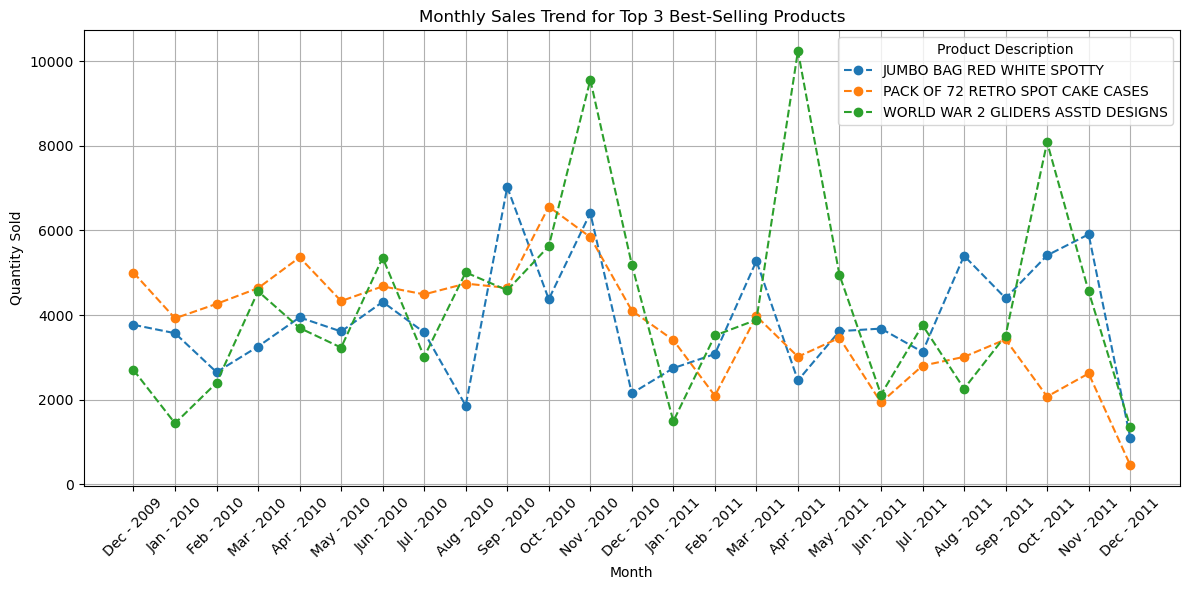

In [37]:
# Plotting the Trend
plt.figure(figsize=(12, 6))

for product in pivot_data.columns:
    plt.plot(pivot_data.index.astype(str), pivot_data[product], marker='o', label=product, linestyle='--')

plt.title('Monthly Sales Trend for Top 3 Best-Selling Products')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')

# Format x-axis to 'Mon YYYY' format
formatted_labels = [month.strftime('%b - %Y') for month in pivot_data.index.to_timestamp()]
plt.xticks(ticks=range(len(formatted_labels)), labels=formatted_labels, rotation=45)

plt.grid(True)
plt.legend(title='Product Description')
plt.tight_layout()
plt.show()

## 2. Top Revenue-Generating Products

In [38]:
# Top Revenue-Generating Products
top_revenue = delivered_products.groupby(by='StockCode').agg({'Description': 'first', 'TotalRevenue': 'sum'}).sort_values(by='TotalRevenue', ascending=False).reset_index()

# Selecting Top 10
top_revenue_10 = top_revenue.head(10)

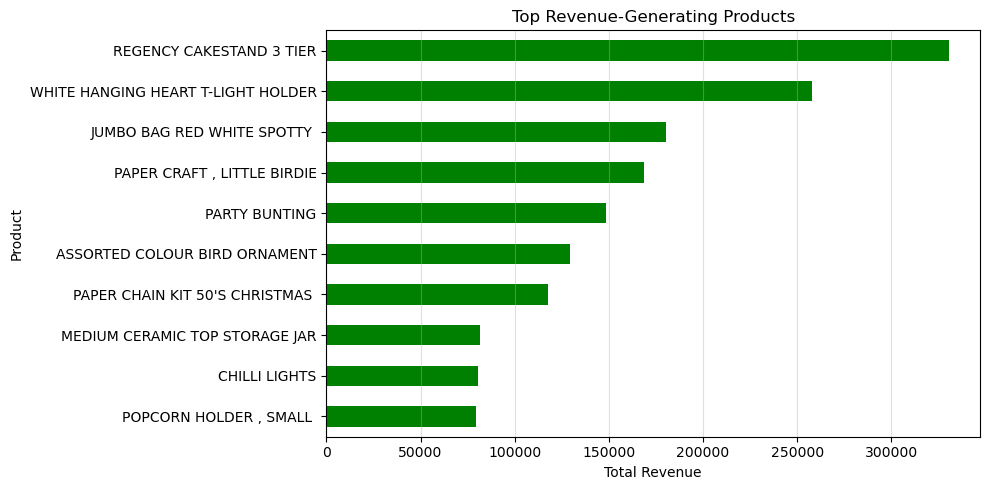

In [39]:
# Plotting
top_revenue_10[::-1].plot(kind='barh', x='Description', y='TotalRevenue', color='green', legend=False, figsize=(10, 5))
plt.title('Top Revenue-Generating Products')
plt.xlabel('Total Revenue')
plt.ylabel('Product')
plt.grid(True, axis='x', alpha=0.4)
plt.tight_layout()
plt.show()

## 3. Relationship Between Quantity Sold and Total Revenue per Product
- A correlation coefficient of **~0.7** indicates a **moderate to strong positive correlation** between Quantity Sold and Total Revenue. This means that, in general, as the quantity of a product sold increases, the total revenue generated by that product also tends to increase.
- However, the correlation is not perfect (1.0), which suggests that:
    - Some products generate significant revenue despite lower sales volumes (likely higher-priced items).
    - Some high-volume products might contribute less to revenue if their price is low.


In [40]:
product_sales_revenue = delivered_products.groupby('StockCode').agg({
    'Quantity': 'sum',
    'TotalRevenue': 'sum'
}).reset_index()

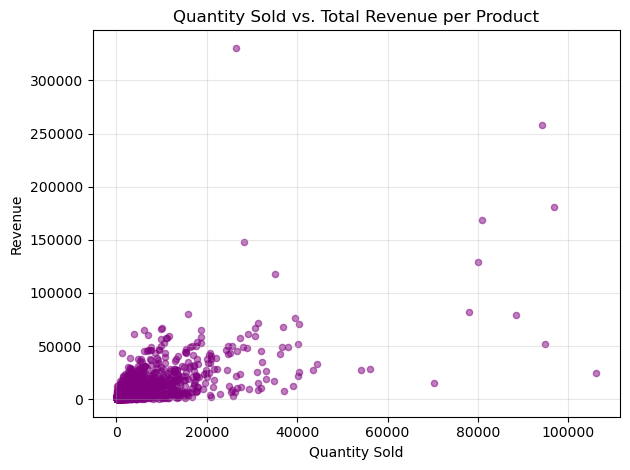

In [41]:
# Scatter Plot to Visualize Relationship
product_sales_revenue.plot.scatter(
    x='Quantity', 
    y='TotalRevenue', 
    alpha=0.5, 
    color='purple'
)
plt.title('Quantity Sold vs. Total Revenue per Product')
plt.xlabel('Quantity Sold')
plt.ylabel('Revenue')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [42]:
# Calculating Correlation between Quantity and Revenue
corr_coeff = product_sales_revenue['Quantity'].corr(product_sales_revenue['TotalRevenue']).round(1)
corr_coeff

0.7

## 4. Identifying the Top Premium Products by Average Unit Price

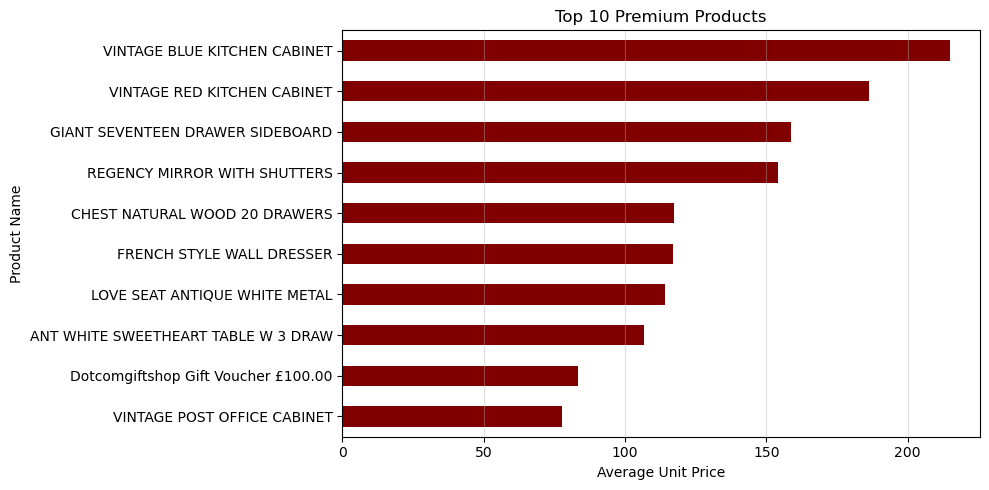

In [43]:
Top10_highest_avg = delivered_products.groupby(by='StockCode').agg({'Description' : 'first', 'UnitPrice' :'mean'}).sort_values(by='UnitPrice', ascending=False).head(10)
Top10_highest_avg

# Identifying Top 10 Most Expensive Products by Average Unit Price
premium_products = delivered_products.groupby('StockCode').agg({'Description': 'first', 'UnitPrice': 'mean'}).sort_values(by='UnitPrice', ascending=False)
top10_premium_products = premium_products.head(10)

# Plotting
top10_premium_products[::-1].plot.barh(x='Description', y='UnitPrice',color='maroon', legend=False, figsize=(10, 5))
plt.title('Top 10 Premium Products')
plt.xlabel('Average Unit Price')
plt.ylabel('Product Name')
plt.grid(True, axis='x', alpha=0.4)
plt.tight_layout()
plt.show()

## 5. Identifying Underperforming Products: Low Demand & Low Revenue
- Products that are both low in quantity sold and revenue generated are likely to be underperforming. Identifying these products helps in making decisions about discontinuation, stock management, or targeted marketing efforts.

In [44]:
# Grouping and summarizing
product_performance = delivered_products.groupby('StockCode').agg({
    'Description': 'first',
    'Quantity': 'sum',
    'TotalRevenue': 'sum'
}).reset_index()

# Defining underperformers: bottom 10% in both Quantity and Total Revenue
quantity_threshold = product_performance['Quantity'].quantile(0.1)
revenue_threshold = product_performance['TotalRevenue'].quantile(0.1)

underperforming_products = product_performance[
    (product_performance['Quantity'] <= quantity_threshold) &
    (product_performance['TotalRevenue'] <= revenue_threshold)
].sort_values(by='TotalRevenue')

# Preview the underperforming products
underperforming_products.sort_values('TotalRevenue', ascending=False).head()

,StockCode,Description,Quantity,TotalRevenue
886,21685,MEDINA STAMPED METAL TRAY,3,44.85
3355,90135,ORANGE/WHT/FUSCHIA STONES NECKLACE,9,44.75
4819,90197D,AMBER GLASS BRACELET HEART CHARMS,9,44.55
4594,90011A,MIDNIGHT BLUE CRYSTAL DROP EARRINGS,15,44.28
4090,84586L,"PINK ROSES/GINGHAM PATCH RABBIT 8""",15,44.25


## 6. Identifying Consistently High-Demand Products Based on Demand Stability
- Products with stable and consistent monthly sales are valuable for business operations and inventory planning.
- By calculating the Coefficient of Variation (CV) for each product's monthly sales quantity, we can measure demand consistency.
- A low CV percentage indicates stable demand over time, making these products reliable candidates for prioritization in stock management, forecasting, and promotions.

In [45]:
# Step 1: Monthly Quantity Pivot
demand_consistency = delivered_products.groupby(['StockCode', 'Month']).agg({'Quantity': 'sum'}).reset_index()

demand_consistency = demand_consistency.pivot_table(
    index='StockCode',
    columns='Month',
    values='Quantity',
    aggfunc='sum',
    fill_value=0
)

# Step 2: Demand Stability Metrics
demand_consistency['Mean'] = demand_consistency.mean(axis=1)
demand_consistency['Standard Deviation'] = demand_consistency.std(axis=1)
demand_consistency['Coefficient of Variation (%)'] = (demand_consistency['Standard Deviation'] / demand_consistency['Mean']) * 100

# Step 3: Select Relevant Columns and Sort
demand_consistency = demand_consistency[['Mean', 'Standard Deviation', 'Coefficient of Variation (%)']].sort_values(
    by='Coefficient of Variation (%)'
).round(2).reset_index()

# Step 4: Merge with Product Descriptions
demand_consistency = demand_consistency.merge(
    product_performance[['StockCode', 'Description']].drop_duplicates(),
    on='StockCode',
    how='left'
)[['StockCode', 'Description', 'Mean', 'Standard Deviation', 'Coefficient of Variation (%)']].sort_values('Coefficient of Variation (%)')

# Top 10 Consistently High Demand Products
demand_consistency

,StockCode,Description,Mean,Standard Deviation,Coefficient of Variation (%)
0,20724,RED SPOTTY CHARLOTTE BAG,1287.88,379.60,29.47
1,20719,WOODLAND CHARLOTTE BAG,979.16,300.46,30.69
2,22356,"CHARLOTTE BAG , PINK/WHITE SPOTS",800.60,251.97,31.47
3,21154,RED SPOTTY OVEN GLOVE,323.80,102.52,31.66
4,21931,JUMBO STORAGE BAG SUKI,1167.28,374.43,32.08
...,...,...,...,...,...
4734,40046C,PINK BUTTERFLY PAPER LAMPSHADE,0.12,0.59,489.90
4735,71101A,ANGEL ON KNEES METAL POLE 100CM H,0.24,1.18,489.90
4736,85186B,BUNNY BUNCH OF FLOWERS,0.56,2.74,489.90
4770,85039b,S/4 IVORY MINI ROSE CANDLE IN BOWL,0.16,0.78,489.90


## 7. Product Revenue Concentration (Pareto 80/20 Analysis)
- Pareto analysis was conducted to understand the distribution of revenue across products.
- The results indicate that approximately **20% of products contribute to 80% of the total revenue**, confirming a classic **Pareto 80/20 effect** in the business.
- This insight highlights the importance of focusing on a small subset of high-performing products for revenue optimization, inventory management, and targeted marketing strateges.


In [46]:
top_revenue = top_revenue.rename(columns={'TotalRevenue':'Revenue'})

# Total revenue for all products
total_revenue = top_revenue['Revenue'].sum()

# Cumulative revenue and cumulative percentage
top_revenue['CumSum (Revenue)'] = top_revenue['Revenue'].cumsum()
top_revenue['CumPercent (Revenue)'] = 100 * top_revenue['CumSum (Revenue)'] / total_revenue

top_revenue = top_revenue.round(2)

In [47]:
# Filter products contributing to 80% revenue
pareto_80 = top_revenue[top_revenue['CumPercent (Revenue)'] <=80]

In [48]:
num_pareto_products = pareto_80.shape[0]
total_products = top_revenue.shape[0]

pareto_percentage = round(100 * (num_pareto_products / total_products), 2)

print(f'{num_pareto_products} out of {total_products} products contribute to 80% of revenue.')
print(f'That is approximately {pareto_percentage}% of all products.')

1040 out of 4899 products contribute to 80% of revenue.
That is approximately 21.23% of all products.


In [49]:
pareto_80.head(10)

,StockCode,Description,Revenue,CumSum (Revenue),CumPercent (Revenue)
0,22423,REGENCY CAKESTAND 3 TIER,330590.32,330590.32,1.68
1,85123A,WHITE HANGING HEART T-LIGHT HOLDER,257724.71,588315.03,2.99
2,85099B,JUMBO BAG RED WHITE SPOTTY,180569.34,768884.37,3.91
3,23843,"PAPER CRAFT , LITTLE BIRDIE",168469.60,937353.97,4.77
4,47566,PARTY BUNTING,148318.28,1085672.25,5.52
5,84879,ASSORTED COLOUR BIRD ORNAMENT,129324.49,1214996.74,6.18
6,22086,PAPER CHAIN KIT 50'S CHRISTMAS,117760.29,1332757.03,6.78
7,23166,MEDIUM CERAMIC TOP STORAGE JAR,81700.92,1414457.95,7.20
8,79321,CHILLI LIGHTS,80540.88,1494998.83,7.61
9,22197,"POPCORN HOLDER , SMALL",79520.20,1574519.03,8.01


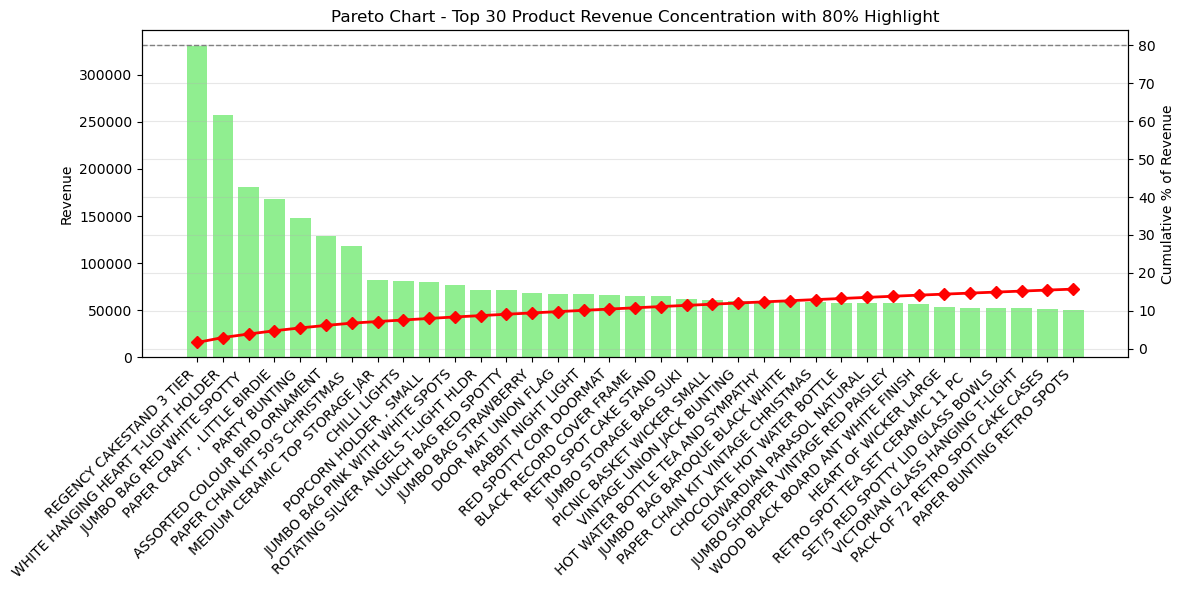

In [50]:
# Keep only top 30 products
top_n = 35
top_revenue_subset = top_revenue.head(top_n).copy()

# Identify products contributing to the first 80% of revenue
top_revenue_subset['Contributes_80'] = top_revenue_subset['CumPercent (Revenue)'] <= 80

fig, ax = plt.subplots(figsize=(12,6))

# Bar colors: Green if contributing to 80%, grey otherwise
bar_colors = top_revenue_subset['Contributes_80'].map({True: 'lightgreen', False: 'lightgrey'})

# Bar plot for Revenue
ax.bar(top_revenue_subset['Description'], top_revenue_subset['Revenue'], color=bar_colors)

# X-axis ticks and labels
ax.set_xticks(range(len(top_revenue_subset)))
ax.set_xticklabels(top_revenue_subset['Description'], rotation=45, ha='right')

# Secondary axis for cumulative %
ax2 = ax.twinx()
ax2.plot(range(len(top_revenue_subset)), top_revenue_subset['CumPercent (Revenue)'], 
         color='red', marker='D', linewidth=2)

# 80% reference line
ax2.axhline(80, color='grey', linestyle='dashed', linewidth=1)

# Labels and titles
ax.set_ylabel('Revenue')
ax2.set_ylabel('Cumulative % of Revenue')
plt.title('Pareto Chart - Top 30 Product Revenue Concentration with 80% Highlight')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Analysis of Returned Products
1. Top Returned Products
2. Products with High Return Rates
3. Return Rate vs. Total Transactions: Identifying High-Risk Products

In [51]:
returned_products = cleaned_retail[cleaned_retail['Returned'] == True].copy()

### 1. Top Returned Products

In [52]:
# Negative quantities indicate returns, we take the absolute sum to get total returned quantity.
highly_returned_products = returned_products.groupby('StockCode').agg({
        'Description': 'first',
        'Quantity': lambda x: abs(x.sum())
    }).sort_values('Quantity', ascending=False).reset_index()
Top10_returned_products = highly_returned_products.head(10)

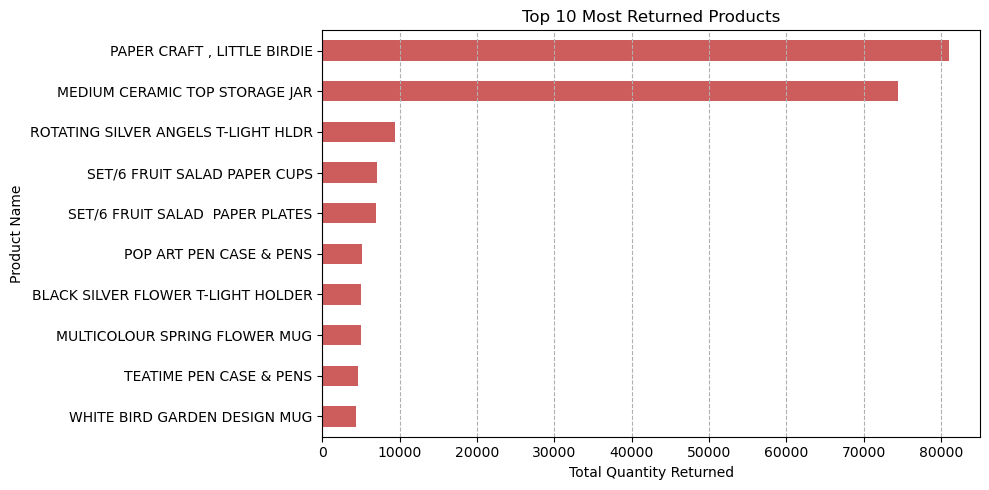

In [53]:
# Visualizing the Most Returned Products
Top10_returned_products.sort_values('Quantity').plot.barh(
    x='Description',
    y='Quantity',
    figsize=(10, 5),
    color='indianred',
    legend=False
)

plt.title('Top 10 Most Returned Products')
plt.xlabel('Total Quantity Returned')
plt.ylabel('Product Name')
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()

### 2. Products with High Return Rates
- Identifying products with unusually high return frequency relative to their total transactions.

In [54]:
# 1. Total Sold per Product (only delivered products)
total_sold = delivered_products.groupby('StockCode').agg({
    'Description': 'first',
    'Quantity': 'sum'
}).rename(columns={'Quantity': 'Total Sold', 'Description': 'Product'})

In [55]:
# 2. Total Returned per Product (absolute values)
total_returned = returned_products.groupby('StockCode').agg({
    'Quantity': lambda x: abs(x.sum())
}).rename(columns={'Quantity': 'Total Returned'})

In [56]:
# 3. Merge Sold and Returned Data
return_rate = total_sold.merge(total_returned, on='StockCode', how='left')
return_rate['Total Returned'] = return_rate['Total Returned'].fillna(0)

# 4. Calculate Total Transactions (Total Sold + Total Returned)
return_rate['Total Transactions'] = return_rate['Total Sold'] + return_rate['Total Returned']

# 5. Calculate Return Rate (%)
return_rate['Return Rate (%)'] = ((return_rate['Total Returned'] / return_rate['Total Transactions']) * 100).round(1)

In [57]:
# 6. Filter Products with at least 30 total transactions
high_return_rate = return_rate[
    (return_rate['Total Transactions']) > 30
].sort_values('Return Rate (%)', ascending=False).reset_index().copy()

# 7. Top 10 Products with Highest Return Rate
top10_high_return_rate = high_return_rate.head(10)

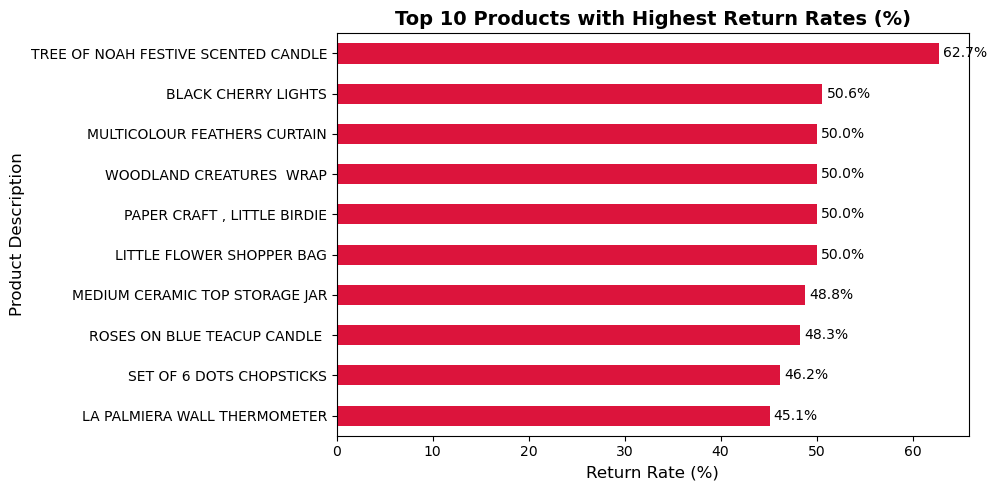

In [58]:
# 8. Bar Plot
ax = top10_high_return_rate.sort_values('Return Rate (%)').plot.barh(
    x='Product',
    y='Return Rate (%)',
    color='crimson',
    legend=False,
    figsize=(10, 5)
)

# Titles and Labels
plt.title('Top 10 Products with Highest Return Rates (%)', fontsize=14, fontweight='bold')
plt.xlabel('Return Rate (%)', fontsize=12)
plt.ylabel('Product Description', fontsize=12)

# Grid
plt.grid(False)


# Add data labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=3, fontsize=10)

plt.tight_layout()
plt.show()

## 3. Return Rate vs. Total Transactions — Identifying High-Risk Products
- Most products cluster at lower return rates.
- The red 'X' markers represent high-risk products with a return rate exceeding 40%.
- Products in the top-right quadrant of the scatter graph (high return rate & high transaction volume) are of particular concern, as they combine both high customer dissatisfaction and significant business impact.

In [59]:
# Filter all products with significant transactions
filtered_products = return_rate[return_rate['Total Transactions'] > 10]

# Filter for products with high return rate and significant transaction volume
high_risk_products = return_rate[
    (return_rate['Return Rate (%)'] > 40) & 
    (return_rate['Total Transactions'] > 10)
].sort_values(['Return Rate (%)', 'Total Transactions'], ascending=[False, False]).reset_index(drop=True)

high_risk_products.head()

,Product,Total Sold,Total Returned,Total Transactions,Return Rate (%)
0,WHITE SCANDINAVIAN HEART CHRISTMAS,1,12.0,13.0,92.3
1,TREE OF NOAH FESTIVE SCENTED CANDLE,57,96.0,153.0,62.7
2,KISS REINDEER SCANDINAVIAN STOCKING,5,6.0,11.0,54.5
3,BLACK CHERRY LIGHTS,242,248.0,490.0,50.6
4,"PAPER CRAFT , LITTLE BIRDIE",80995,80995.0,161990.0,50.0


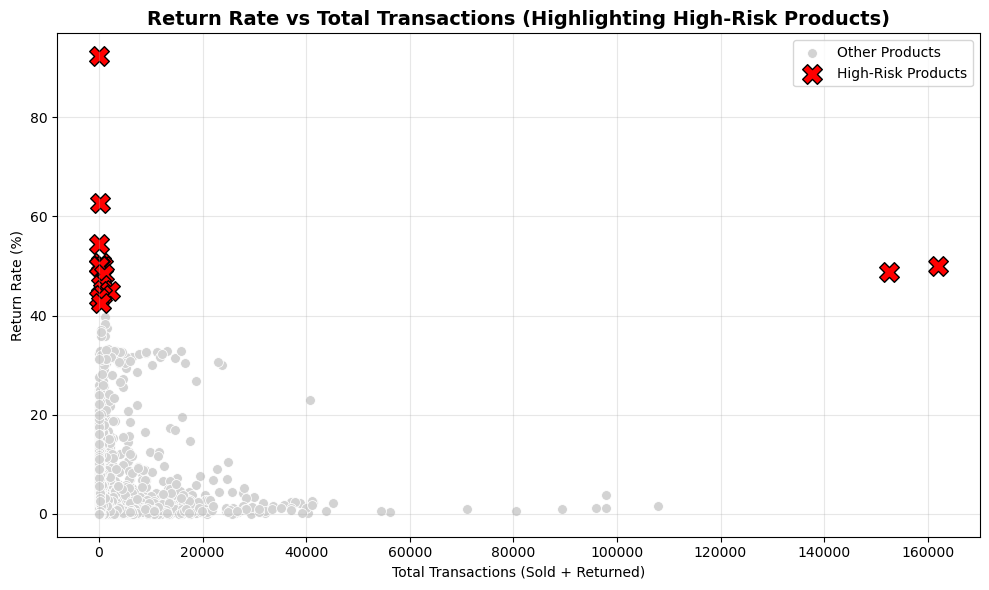

In [60]:
plt.figure(figsize=(10, 6))

# 1. Plot all products (background layer)
sns.scatterplot(
    data=filtered_products,
    x='Total Transactions',
    y='Return Rate (%)',
    color='lightgrey',
    alpha=1,
    s=50,
    label='Other Products'
)

# 2. Highlight high-risk products
sns.scatterplot(
    data=high_risk_products,
    x='Total Transactions',
    y='Return Rate (%)',
    color='red',
    s=200,
    marker='X',
    edgecolor='black',
    linewidth=1,
    label='High-Risk Products'
)

# Titles and labels
plt.title("Return Rate vs Total Transactions (Highlighting High-Risk Products)", fontsize=14, fontweight='bold')
plt.xlabel("Total Transactions (Sold + Returned)")
plt.ylabel("Return Rate (%)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Customer Behavior Analysis
1. Customer Purchase Frequency Analysis
   - Customer Purchase Frequency Distribution with Top 5% Threshold
   - Top 10 High Purchase Frequency Customers
2. High Return Rate Customers
3. Top Customers by Customer Lifetime Value (CLV)
4. Relationship Between Customer Lifetime Value (CLV) and Return Behavior
5. RFM Analysis (Recency, Frequency, Monetary)
6. Customer Segmentation Using RFM Analysis
7. RFM Segment-Based Revenue Contribution

## 1. Customer Purchase Frequency Analysis 
- The majority of customers place only a few orders, which is expected in typical retail purchasing behavior.
- A small subset of customers significantly exceeds this typical buying pattern.
- The red vertical line on the distribution represents the 95th percentile threshold, which was used to visually separate the top 5% of customers with higher purchase frequency than the rest.
- These high-frequency customers are likely to be:
    - Loyal, repeat buyers who actively engage with the business.
    - High-value or VIP customers contributing significantly to revenue.
    - Strong candidates for loyalty programs, exclusive offers, or priority services.port.


In [61]:
# High Transaction Customers - Measuring Purchase Frequency
high_txn_customers = delivered_products.groupby('CustomerID').agg({
    'Invoice': 'nunique'
}).rename(columns={'Invoice': 'Total Orders'}).sort_values('Total Orders', ascending=False).reset_index()

# Threshold definition (Top 5% customers based on total orders)
high_freq_threshold = high_txn_customers['Total Orders'].quantile(0.95)
threshold_value = int(high_freq_threshold)

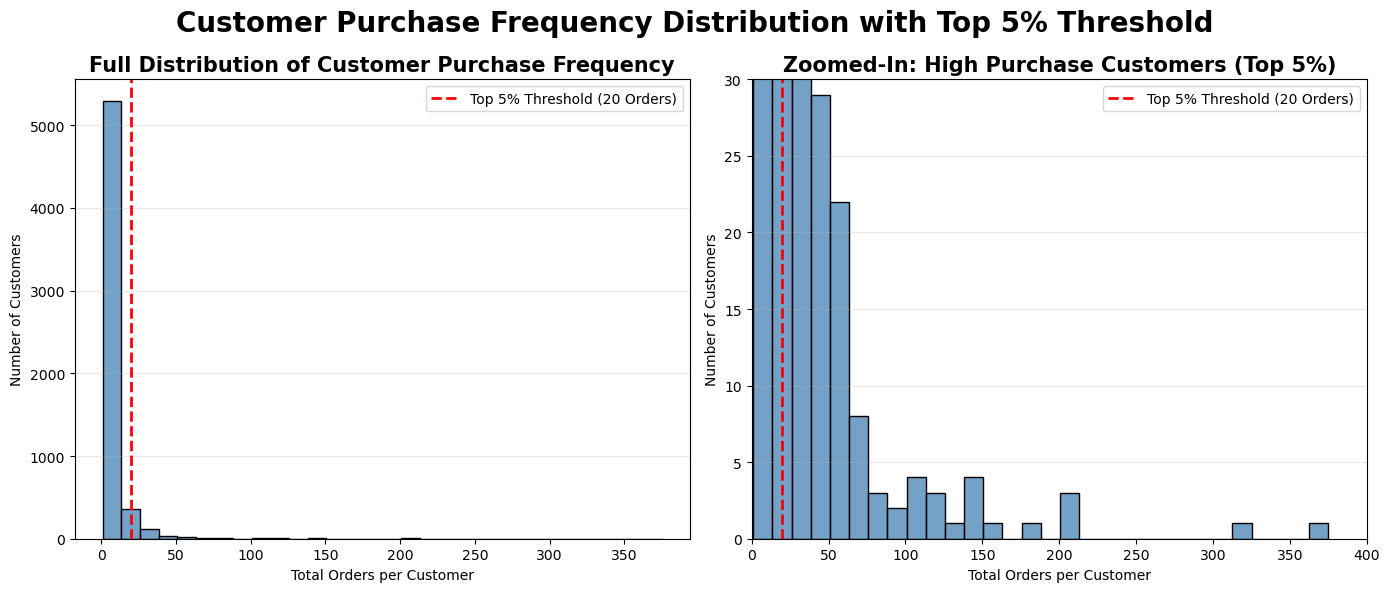

In [62]:
# Set up the figure
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Left Plot: Full Distribution
sns.histplot(high_txn_customers['Total Orders'], bins=30, color='steelblue', ax=axes[0])
axes[0].axvline(high_freq_threshold, color='red', linestyle='--', linewidth=2, 
                label=f'Top 5% Threshold ({threshold_value} Orders)')
axes[0].set_title('Full Distribution of Customer Purchase Frequency', fontsize=15, fontweight='bold')
axes[0].set_xlabel('Total Orders per Customer')
axes[0].set_ylabel('Number of Customers')
axes[0].grid(axis='y', alpha=0.3)
axes[0].legend()

# Right Plot: Zoomed-In Tail (High Purchase Customers)
sns.histplot(high_txn_customers['Total Orders'], bins=30, color='steelblue', ax=axes[1])
axes[1].axvline(high_freq_threshold, color='red', linestyle='--', linewidth=2, 
                label=f'Top 5% Threshold ({threshold_value} Orders)')
axes[1].set_xlim(0, 400)  # Adjust based on your data
axes[1].set_ylim(0, 30)   # Optional: adjust based on your y-axis scale
axes[1].set_title('Zoomed-In: High Purchase Customers (Top 5%)', fontsize=15, fontweight='bold')
axes[1].set_xlabel('Total Orders per Customer')
axes[1].set_ylabel('Number of Customers')
axes[1].grid(axis='y', alpha=0.3)
axes[1].legend()

plt.suptitle('Customer Purchase Frequency Distribution with Top 5% Threshold', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

In [63]:
# Top 10 High-Frequency Customers
top10_high_freq_customers = high_txn_customers.head(10).copy()

# Ensure CustomerID is treated as string for better axis labeling
top10_high_freq_customers['CustomerID'] = top10_high_freq_customers['CustomerID'].astype(int).astype(str)

# Sort by 'Total Orders' for clear ascending bar plot
top10_high_freq_customers = top10_high_freq_customers.sort_values('Total Orders')

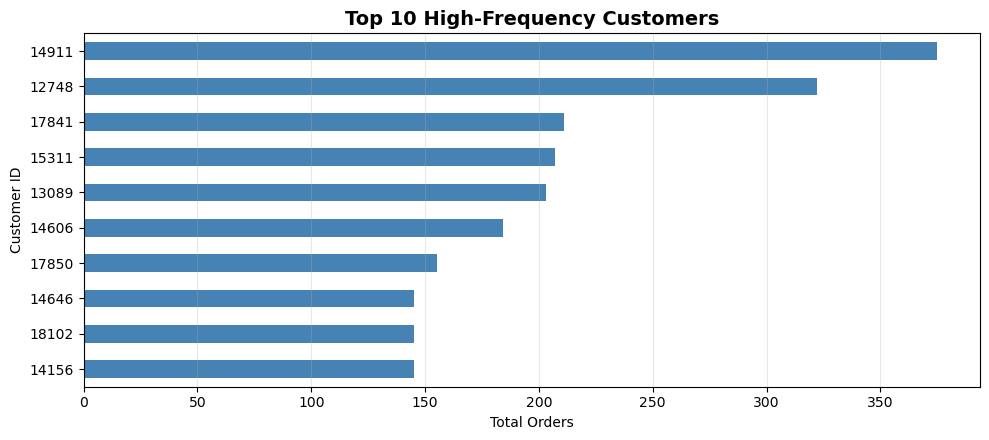

In [64]:
# Plot horizontal bar chart
top10_high_freq_customers.plot.barh(
    x='CustomerID',
    y='Total Orders',
    color='steelblue',
    legend=False,
    figsize=(10, 4.5)
)

# Titles and labels
plt.title('Top 10 High-Frequency Customers', fontsize=14, fontweight='bold')
plt.xlabel('Total Orders')
plt.ylabel('Customer ID')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## 2. High Return Rate Customers
- While occasional product returns are expected in any retail business, consistently high return rates from specific customers can indicate deeper issues such as:
    - Policy exploitation (e.g., customers abusing generous return policies) 
    - Product dissatisfaction (e.g., poor quality, inaccurate descriptions)
    - Operational problems (e.g., damaged shipments, incorrect items)
- We calculated the return rate for each customer as the percentage of returned products relative to their total transactions.
- To avoid misleading results from customers with very few purchases, we applied a minimum transaction threshold based on the 25th percentile of total transactions.
- Finally, we visualized the top 10 customers with the highest return rates, considering only those with enough transactions to ensure the results are meaningful.

In [65]:
# 1. Total Delivered Products per Customer
delivered_customers = delivered_products.groupby('CustomerID').agg({
    'Quantity': 'sum'
}).rename(columns={'Quantity': 'Quantity_Delivered'})

# 2. Total Returned Products per Customer (absolute quantity)
returned_products['Quantity'] = np.abs(returned_products['Quantity'])

returned_customers = returned_products.groupby('CustomerID').agg({
    'Quantity': 'sum'
}).rename(columns={'Quantity': 'Quantity_Returned'})

# 3. Merge Delivered and Returned Quantities
return_rate = delivered_customers.merge(returned_customers, on='CustomerID', how='left').fillna(0).reset_index()

# 4. Total Transactions and Return Rate Calculation
return_rate['Total_Transactions'] = return_rate['Quantity_Delivered'] + return_rate['Quantity_Returned']
return_rate['Return_Rate (%)'] = (return_rate['Quantity_Returned'] / return_rate['Total_Transactions']) * 100

In [66]:
# 5. Choosing Logical Transaction Threshold (25th percentile)
transaction_threshold = return_rate['Total_Transactions'].quantile(0.25)
print(f"Transaction threshold: {int(transaction_threshold)} transactions")

Transaction threshold: 192 transactions


In [67]:
# 6. Filter Customers Above Threshold and Sort by Return Rate
filtered_return_rate = return_rate[return_rate['Total_Transactions'] > transaction_threshold].sort_values(['Return_Rate (%)', 'Total_Transactions'], ascending=False).reset_index()

# 7. Top 10 High Return Rate Customers
top_10_return_rate = filtered_return_rate.head(10)

<Figure size 1000x600 with 0 Axes>

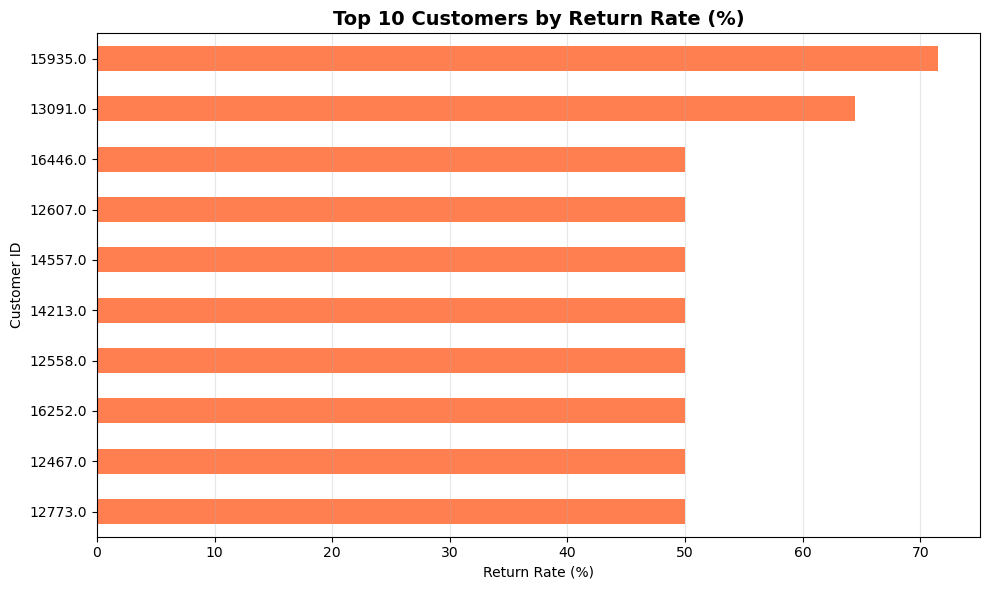

In [68]:
# Plot Top 10 High Return Rate Customers (Horizontal Bar Chart)
plt.figure(figsize=(10, 6))
top_10_return_rate.sort_values(['Return_Rate (%)', 'Total_Transactions']).plot.barh(
    x='CustomerID',
    y='Return_Rate (%)',
    color='coral',
    legend=False,
    figsize=(10, 6)
)

# Titles and labels
plt.title('Top 10 Customers by Return Rate (%)', fontsize=14, fontweight='bold')
plt.xlabel('Return Rate (%)')
plt.ylabel('Customer ID')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## 3. Top Customers by Customer Lifetime Value (CLV)
- Customer Lifetime Value estimates how much revenue a customer generates over their **lifetime** with the business.

In [69]:
# 1. Total Delivered Revenue per Customer
customer_delivered_revenue = delivered_products.groupby('CustomerID').agg({
    'TotalRevenue': 'sum'
}).reset_index().rename(columns={'TotalRevenue': 'Delivered_Revenue'})

# 2. Total Returned Revenue per Customer (ensure revenue is positive)
returned_products['Revenue'] = returned_products['UnitPrice'] * returned_products['Quantity'].abs()

customer_returned_revenue = returned_products.groupby('CustomerID').agg({
    'Revenue': 'sum'
}).reset_index().rename(columns={'Revenue': 'Returned_Revenue'})

# 3. Merge and Calculate Customer Lifetime Value
clv = customer_delivered_revenue.merge(customer_returned_revenue, on='CustomerID', how='left')
clv['Returned_Revenue'] = clv['Returned_Revenue'].fillna(0)
clv['Customer_Lifetime_Value'] = clv['Delivered_Revenue'] - clv['Returned_Revenue']

In [70]:
# 4. Sort and Select Top 10 Customers by CLV
clv = clv.sort_values('Customer_Lifetime_Value', ascending=False).reset_index(drop=True)
top10_clv = clv.head(10)

<Figure size 1000x600 with 0 Axes>

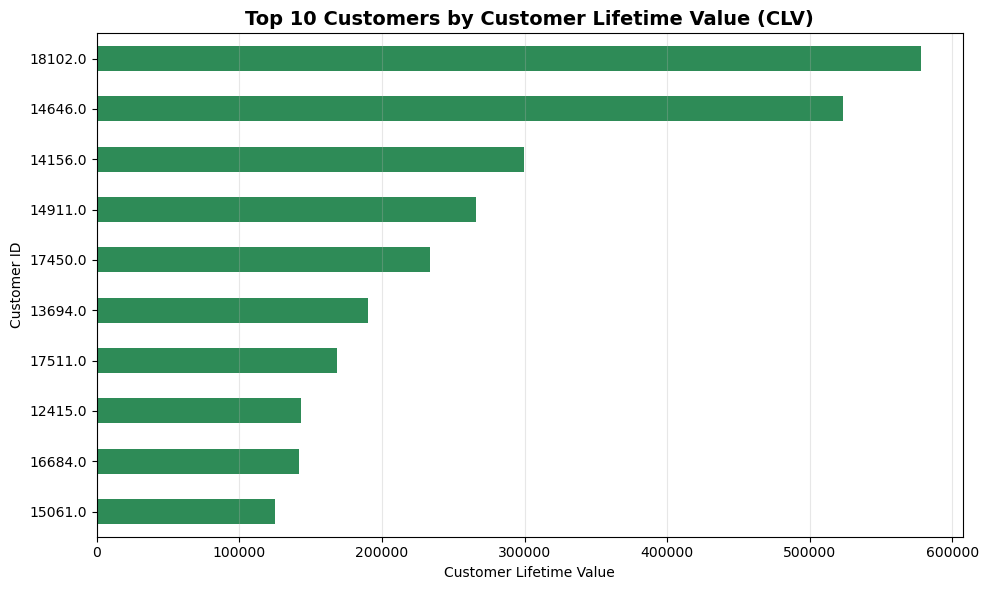

In [71]:
# 5. Horizontal Bar Plot for Top 10 Customers by CLV
plt.figure(figsize=(10, 6))
top10_clv.sort_values('Customer_Lifetime_Value').plot.barh(
    x='CustomerID',
    y='Customer_Lifetime_Value',
    color='seagreen',
    legend=False,
    figsize=(10, 6)
)

# Titles and Labels
plt.title('Top 10 Customers by Customer Lifetime Value (CLV)', fontsize=14, fontweight='bold')
plt.xlabel('Customer Lifetime Value')
plt.ylabel('Customer ID')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## 4. Relationship Between Customer Lifetime Value (CLV) and Return Behavior
- **Majority of Customers Have Low CLV and Low Return Rates**
    - A dense cluster is visible in the bottom-left corner, indicating most customers contribute low revenue and rarely return products.
- **High Return Rates Are Mostly Among Low CLV Customers**
    - The highest return rates (above 20%, some exceeding 50%) occur almost exclusively among customers with very low CLV, often near zero.
- **High CLV Customers Have Minimal Return Rates**
    - Customers with high CLV (above ~100,000) consistently show return rates close to 0%, forming a tight cluster along the lower-right area of the plot.
- **No Significant High CLV, High Return Rate Cases**
    - There are no visible outliers with both high CLV and high return rates, suggesting that top customers are not generating excessive returns.

In [72]:
# Merge CLV and Return Rate Data
clv_return_rate_merge = clv.merge(return_rate[['CustomerID', 'Return_Rate (%)']], on='CustomerID', how='left')

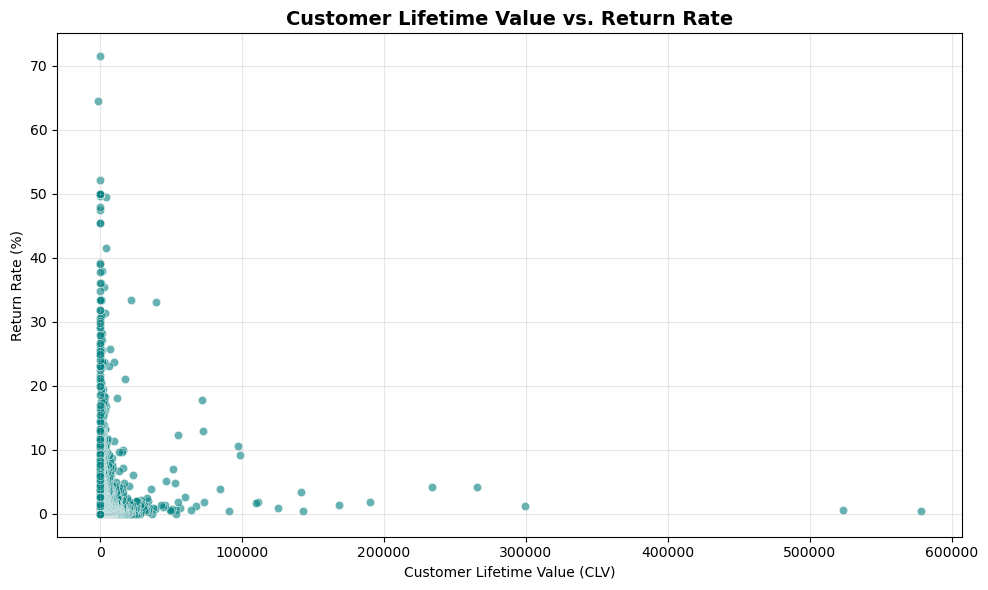

In [73]:
# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=clv_return_rate_merge,
    x='Customer_Lifetime_Value',
    y='Return_Rate (%)',
    color='teal',
    alpha=0.6
)

# Titles and labels
plt.title('Customer Lifetime Value vs. Return Rate', fontsize=14, fontweight='bold')
plt.xlabel('Customer Lifetime Value (CLV)')
plt.ylabel('Return Rate (%)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('scatterclv.jpg')
plt.show()

## 5. RFM Analysis (Recency, Frequency, Monetary)- RFM (Recency, Frequency, Monetary) analysis helps categorize customers based on how recently they purchased, how often they purchase, and how much they spend. high-value

In [74]:
# 1. Get last purchase date
last_purchase_date = delivered_products['InvoiceDate'].max()

# 2. Reference date
reference_date = last_purchase_date + timedelta(days=1)

print(f'Last Purchase Date: {last_purchase_date.date()}')
print(f'Reference Date: {reference_date.date()}')

# 3. Recency Calculation (keep datetime type)
recency = delivered_products.groupby('CustomerID').agg({'InvoiceDate': 'max'}).rename(columns={'InvoiceDate': 'LastPurchaseDate'}).reset_index()

# 4. Recency in days
recency['Recency'] = (reference_date - recency['LastPurchaseDate']).dt.days

Last Purchase Date: 2011-12-09
Reference Date: 2011-12-10


In [75]:
# frequency Calcualtion
frequency = delivered_products.groupby('CustomerID').agg({
    'Invoice': 'nunique'
}).rename(columns={'Invoice': 'Frequency'}).reset_index()

# Monetary Calculation
monetary = delivered_products.groupby('CustomerID').agg({
    'TotalRevenue': 'sum'
}).reset_index().rename(columns={'TotalRevenue': 'Monetary'})

rfm = recency[['CustomerID', 'Recency']].merge(frequency, on='CustomerID', how='left').merge(monetary, on='CustomerID', how='left')

In [76]:
# Recency Score: Lower Recency = Better
rfm['Recency_Score'] = pd.qcut(rfm['Recency'], q=5, labels=[5, 4, 3, 2, 1])

# Frequency Score: Higher Frequency = Better
rfm['Frequency_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), q=5, labels=[1, 2, 3, 4, 5])

# Monetary Score: Higher Monetary = Better
rfm['Monetary_Score'] = pd.qcut(rfm['Monetary'], q=5, labels=[1, 2, 3, 4, 5])

In [77]:
# Combine Scores into a single RFM segment code
rfm['RFM_Segment'] = rfm['Recency_Score'].astype(int).astype(str) + rfm['Frequency_Score'].astype(int).astype(str) + rfm['Monetary_Score'].astype(int).astype(str)

# View segments
rfm.head()

,CustomerID,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Segment
0,12346.0,326,12,77556.46,2,5,5,255
1,12347.0,2,8,4921.53,5,4,5,545
2,12348.0,75,5,1658.40,3,4,4,344
3,12349.0,19,3,3678.69,5,3,5,535
4,12350.0,310,1,294.40,2,1,2,212


## 6. Customer Segmentation Using RFM Analysis
* **Champions**: Recent, frequent buyers who spend the most. Most valuable customers.
* **Loyal Customers**: Regular buyers with good spend and engagement.
* **Potential Loyalists**: Recent buyers with decent frequency and spend. Can become loyal with the right approach.
* **New Customers**: Recently made their first few purchases. Need nurturing.
* **At Risk**: Previously good customers who haven’t purchased recently. Risk of churn.
* **Hibernating**: Customers inactive for a long time. Potential to re-engage.
* **Others**: Customers who don't clearly fall into these groups.ture. offer

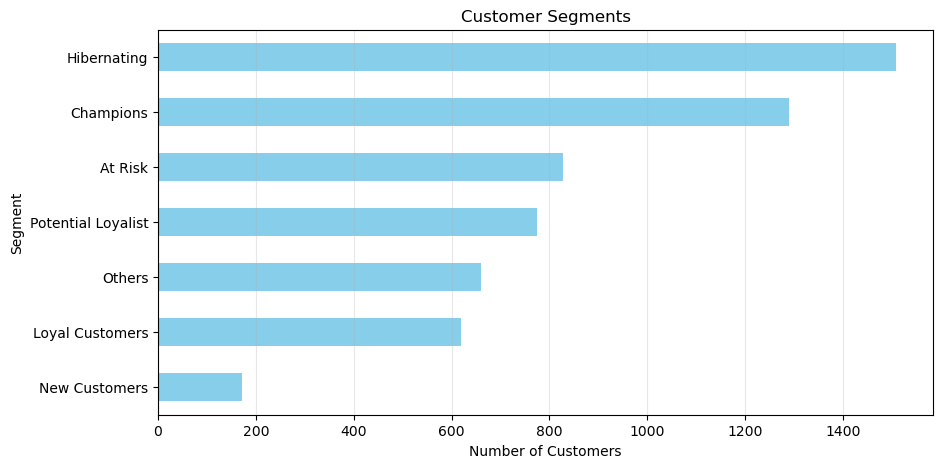

In [78]:
def assign_segment(row):
    # Best customers: Recent, frequent, high spenders
    if row['Recency_Score'] >= 4 and row['Frequency_Score'] >= 4 and row['Monetary_Score'] >= 4:
        return 'Champions'
    # Recent & frequent customers
    elif row['Recency_Score'] >= 4 and row['Frequency_Score'] >= 3:
        return 'Loyal Customers'
    # Potential to become loyal
    elif row['Recency_Score'] >= 3 and row['Frequency_Score'] >= 3:
        return 'Potential Loyalist'
    # Very recent but only one purchase
    elif row['Recency_Score'] >= 4 and row['Frequency_Score'] == 1:
        return 'New Customers'
    # Haven't bought recently, but were frequent
    elif row['Recency_Score'] <= 2 and row['Frequency_Score'] >= 3:
        return 'At Risk'
    # Long time since last purchase, low frequency
    elif row['Recency_Score'] <= 2:
        return 'Hibernating'
    # Catch-all
    else:
        return 'Others'

# Apply Segmentation
rfm['Segment'] = rfm.apply(assign_segment, axis=1)

# Plot Segment Distribution
rfm['Segment'].value_counts().sort_values().plot(
    kind='barh', 
    color='skyblue',
    figsize=(10,5)
)
plt.title('Customer Segments')
plt.xlabel('Number of Customers')
plt.ylabel('Segment')
plt.grid(True, axis='x', alpha=0.3)
plt.show()


## 7. RFM Segment-Based Revenue Contribution

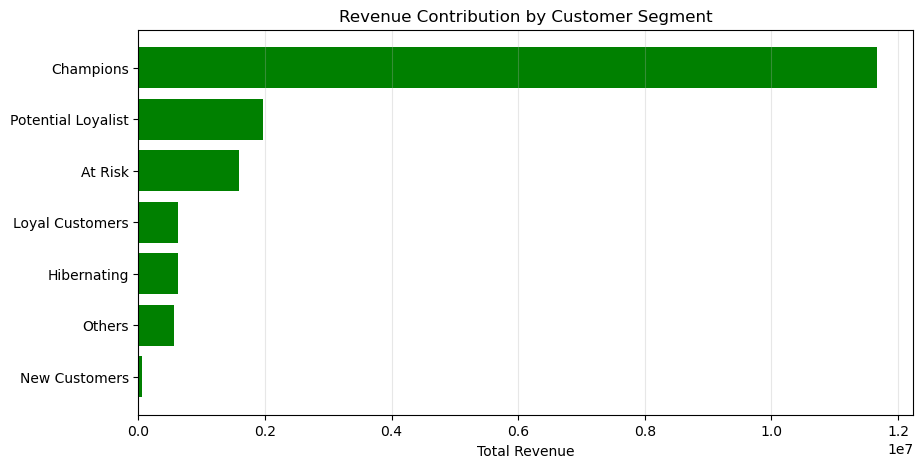

In [79]:
# Group and sum revenue by segment
rfm_revenue = rfm.groupby('Segment').agg({'Monetary': 'sum'}).reset_index()

# Sort for plotting
rfm_revenue = rfm_revenue.sort_values(by='Monetary', ascending=True)

# Plot
plt.figure(figsize=(10, 5))
plt.barh(rfm_revenue['Segment'], rfm_revenue['Monetary'], color='green')
plt.title('Revenue Contribution by Customer Segment')
plt.xlabel('Total Revenue')
plt.grid(axis='x', alpha=0.3)
plt.show()

# Time Series Revenue Trend
- Analyzing revenue over time helps identify seasonal patterns and business growth.
- The revenue graph shows clear **seasonal spikes** in **October and November** of both 2010 and 2011, likely driven by increased sales during the holiday season.
- This is followed by noticeable revenue drops in **December and January**, which is common after major shopping periods.
- Overall, revenue fluctuates throughout the year but exhibits **recurring annual patterns**, indicating seasonality in customer purchasing behavor.


In [80]:
monthly_revenue = delivered_products.groupby('Month').agg({'TotalRevenue':'sum'}).reset_index()

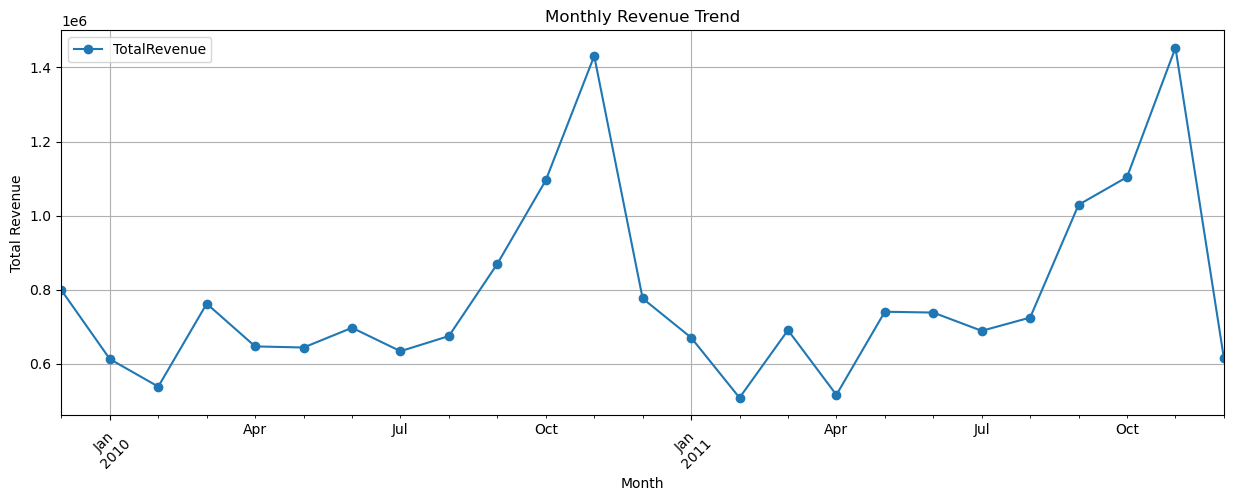

In [81]:
monthly_revenue.plot(
    x='Month', 
    y='TotalRevenue', 
    kind='line', 
    figsize=(15,5), 
    marker='o', 
    title='Monthly Revenue Trend'
)

plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig('trend_chart.jpg')
plt.show()